In [ ]:
cd ..

In [2]:
mkdir -p figures/fig2

In [3]:
import numpy as np
import pandas as pd
import re
import seaborn as sns

from matplotlib import pyplot as plt

In [4]:
# Genes we want to plot - commenting out those that are not as interesting.
# TODO: make a configurable "to_plot" key
genes_of_interest = {
    'HNEAP_RS07320': dict(name='Crp/Fnr', kind='regulation'),
    'HNEAP_RS01030': dict(name='DAB2B', kind='transport'),
    'HNEAP_RS01035': dict(name='DAB2A', kind='transport'), 
    'HNEAP_RS04585': dict(name='DAB1B', kind='transport'),
    'HNEAP_RS04595': dict(name='DAB1A', kind='transport'),
    'HNEAP_RS01040': dict(name='LysR DAB2', kind='regulation'),
    'HNEAP_RS04645': dict(name='csosCA', kind='CA'),
    'HNEAP_RS04565': dict(name='csos1D', kind='carboxysome'),
    'HNEAP_RS04655': dict(name='cbbS', kind='carboxysome rubisco'),
    'HNEAP_RS04660': dict(name='cbbL', kind='carboxysome rubisco'),
    'HNEAP_RS04615': dict(name='acRAF', kind='chaperone'),
    'HNEAP_RS04625': dict(name='csos1A', kind='carboxysome'),
    'HNEAP_RS05490': dict(name='LysR', kind='regulation'),
    'HNEAP_RS04640': dict(name='csos4A', kind='carboxysome'),
    'HNEAP_RS04635': dict(name='csos4B', kind='carboxysome'),
    'HNEAP_RS04650': dict(name='csos2', kind='carboxysome'),
    'HNEAP_RS04630': dict(name='csos1C', kind='carboxysome'), 
    # Non-carboxysomal FII rubisco was named cbbM in Baker et al. JBac 1998.
    'HNEAP_RS05505': dict(name='cbbM', kind='non-carboxysomal rubisco'),
    'HNEAP_RS04600': dict(name='cbbO', kind='chaperone'),
    'HNEAP_RS04575': dict(name='cbbQ', kind='chaperone'),
}

categories2plot = {
    'transport': True,
    'carboxysome': True,
    'CA': True,
    'carboxysome rubisco': True,
    'regulation': False,
    'chaperone': False,
    'non-carboxysomal rubisco': False
}

locus2plot = [g for g, props in genes_of_interest.items()
              if categories2plot.get(props['kind'], False)]

barseq_df = pd.read_csv('data/Hnea/barseq/fit_logratios_all.csv')

In [5]:
# Make a long-form version of the barseq data as it's simpler for seaborn plotting.
numeric_cols = (barseq_df.dtypes == np.float64)
long_df = barseq_df.melt('locus_id', value_vars=barseq_df.columns[numeric_cols])

# Add categorical information.
default_props = dict(kind='other')
gene_tags = [genes_of_interest.get(row.locus_id, default_props)['kind'] 
             for _, row in long_df.iterrows()]

# Strip the .1 suffix in the condition name that comes from melt().
conds = [re.sub('CO2.\d+', 'CO2', row.variable) for _, row in long_df.iterrows()]
long_df['gene_tag'] = gene_tags
long_df['cond'] = conds

# Shorter data frame for faster plotting of main-text genes.
mask = long_df.locus_id.isin(genes_of_interest.keys())
long_subset_df = long_df[mask]

long_subset_df.head()

,locus_id,variable,value,gene_tag,cond
192,HNEAP_RS01030,5% CO2,-0.009401,transport,5% CO2
193,HNEAP_RS01035,5% CO2,0.052684,transport,5% CO2
194,HNEAP_RS01040,5% CO2,0.104180,regulation,5% CO2
648,HNEAP_RS04565,5% CO2,0.015781,carboxysome,5% CO2
650,HNEAP_RS04575,5% CO2,-0.129304,chaperone,5% CO2


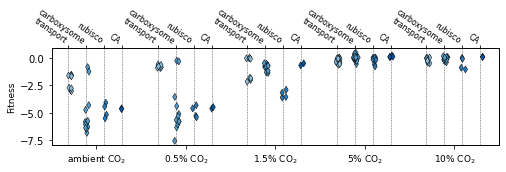

In [6]:
plt.figure(figsize=(7,2.5))
xorder = 'ambient CO2,0.5% CO2,1.5% CO2,5% CO2,10% CO2'.split(',')
hue_order = 'transport,carboxysome,carboxysome rubisco,CA'.split(',')
pal = sns.color_palette('Blues')
greys = sns.color_palette('Greys')

sns.stripplot(data=long_subset_df, x='cond', y='value', hue='gene_tag', dodge=0.25,
              order=xorder, hue_order=hue_order,
              marker='d', edgecolor='k', linewidth=0.5, palette=pal[-4:])
plt.legend().set_visible(False)

xticks = 'ambient CO$_2$,0.5% CO$_2$,1.5% CO$_2$,5% CO$_2$,10% CO$_2$'.split(',')
plt.xticks(np.arange(5), xticks, rotation=0, ha='center', fontsize=9)
plt.ylabel('Fitness', fontsize=9)
plt.xlabel('')

xticks = np.arange(0, 0.8, 0.2) - 0.3125
xticks = np.hstack([xticks, xticks+1, xticks+2, xticks+3, xticks+4])
xtick_str = 'transport,carboxysome,rubisco,CA'.split(',')*5
for xpos in xticks:
    plt.axvline(xpos, ls='--', lw=0.5, zorder=-1, color=greys[-2])
    
ax = plt.gca()
axT = ax.twiny()
plt.sca(axT)

plt.xticks(xticks, xtick_str, ha='right', rotation=-35, fontsize=8)
plt.tick_params(pad=0)
plt.xlim(ax.get_xlim())

plt.tight_layout()
plt.savefig('figures/fig2/fig2.png', dpi=600, facecolor='w')
plt.show()

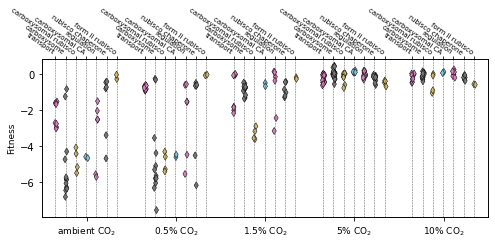

In [7]:
# Longer version of the main-text figure.
plt.figure(figsize=(7,3.5))
xorder = 'ambient CO2,0.5% CO2,1.5% CO2,5% CO2,10% CO2'.split(',')
hue_order = 'transport,carboxysome,carboxysome rubisco,CA,regulation,chaperone,non-carboxysomal rubisco'.split(',')
pal = sns.color_palette('muted')
greys = sns.color_palette('Greys')

sns.stripplot(data=long_subset_df, x='cond', y='value', hue='gene_tag', dodge=0.25,
              order=xorder, hue_order=hue_order,
              marker='d', edgecolor='k', linewidth=0.5, palette=pal[-4:])
plt.legend().set_visible(False)

xticks = 'ambient CO$_2$,0.5% CO$_2$,1.5% CO$_2$,5% CO$_2$,10% CO$_2$'.split(',')
plt.xticks(np.arange(5), xticks, rotation=0, ha='center', fontsize=9)
plt.ylabel('Fitness', fontsize=9)
plt.xlabel('')

xticks = np.arange(0, 0.7, 0.115) - 0.35
xticks = np.hstack([xticks, xticks+1, xticks+2, xticks+3, xticks+4])
xtick_str = 'transport,carboxysome,carboxysomal rubisco,carboxysomal CA,regulation,rubisco chaperone,form II rubisco'.split(',')*5

ax = plt.gca()
axT = ax.twiny()
plt.sca(axT)

plt.xlim(ax.get_xlim())
for xpos in xticks:
    plt.axvline(xpos, ls='--', lw=0.5, zorder=-1, color=greys[-2])
plt.xticks(xticks, xtick_str, ha='right', rotation=-35, fontsize=7)
plt.tick_params(pad=0)

plt.tight_layout()
plt.savefig('figures/fig2/fig2_S1.png', dpi=600, facecolor='w')
plt.show()

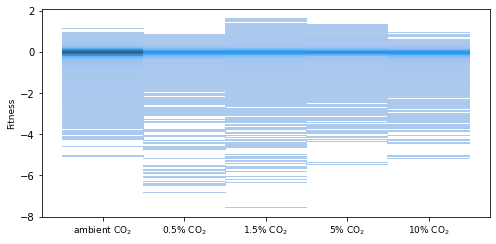

In [8]:
# Plotting the histograms of mutant fitness in all conditions.
# Note: plot includes duplicate data for most genes since experiments are in bio duplicate. 
plt.figure(figsize=(7,3.5))
sns.histplot(data=long_df, x='cond', y='value', stat='count')

xticks = 'ambient CO$_2$,0.5% CO$_2$,1.5% CO$_2$,5% CO$_2$,10% CO$_2$'.split(',')
plt.xticks(np.arange(5), xticks, rotation=0, ha='center', fontsize=9)
plt.xlabel('')
plt.ylabel('Fitness', fontsize=9)

plt.tight_layout()
plt.savefig('figures/fig2/fig2_S2.png', dpi=600, facecolor='w')
plt.show()

In [9]:
# Can't plot pairwise data with biological duplicates, so we take the mean fitness per-gene first.
mean_fitness_df = long_df.groupby(['locus_id', 'cond']).mean().reset_index()
mean_fitness_df = mean_fitness_df.pivot('locus_id', 'cond')['value']

# Add categorical information.
default_props = dict(kind='other')
gene_tags = [genes_of_interest.get(locus_id, default_props)['kind'] 
             for locus_id, row in mean_fitness_df.iterrows()]
mean_fitness_df['gene_tag'] = gene_tags

mean_fitness_df.head()

cond,0.5% CO2,1.5% CO2,10% CO2,5% CO2,ambient CO2,gene_tag
locus_id,,,,,,
GFF1190,-0.080285,0.021461,-0.079133,-0.001788,0.049010,other
GFF1209,0.033399,0.198126,-0.086236,0.031059,-0.082330,other
GFF1357,-1.188559,-1.082507,-0.924616,-0.842707,-0.329688,other
GFF1439,0.173600,-0.154247,0.095518,-0.175644,-0.279369,other
GFF1496,-0.580384,0.029104,-0.227856,0.285289,0.255138,other


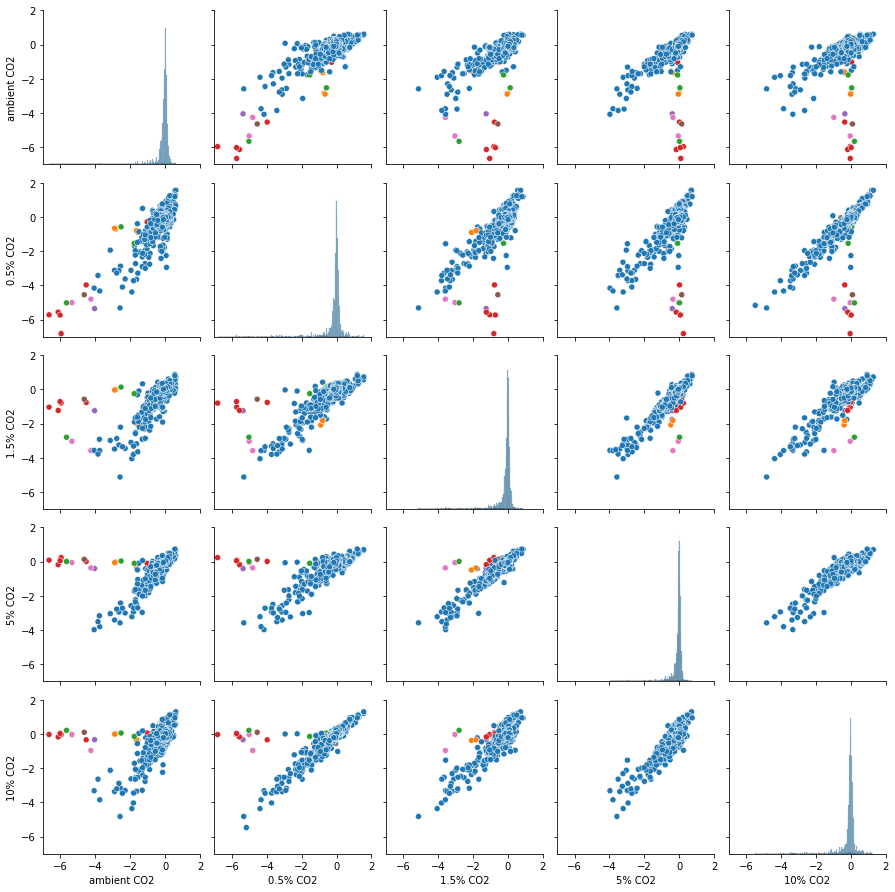

In [10]:
co2_order = 'ambient CO2,0.5% CO2,1.5% CO2,5% CO2,10% CO2'.split(',')
g = sns.PairGrid(mean_fitness_df, vars=co2_order, hue='gene_tag')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.set(ylim=(-7, 2), xlim=(-7, 2))

plt.tight_layout()
plt.savefig('figures/fig2/fig2_S3.png', dpi=600, facecolor='w')
plt.show()